In [3]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

In [4]:
def month_saved(data):
    m,n = data.shape
    month_sa = []
    for i in range(12):
        T = []
        for j in range(m):
            if j%12 == i and data['TA_F_MDS'][j] != -9999:
                T.append(data['TA_F_MDS'][j])
        if np.mean(T) >= 0:
            month_sa.append(i+1)
    return month_sa

In [9]:
type_data = pd.read_csv('C:/Users/111/Desktop/Fluxnet_sites.csv', encoding='latin-1')
site_IGBP = type_data['IGBP'].values
site_ID =  type_data['SITE_ID'].values

path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

result = np.zeros((152, 5))
result[:] = np.nan

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5
site_list = ['site_id']
site_lucc = ['site_lucc']
i0 = 1
for csv_file1 in os.listdir(path1):
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            print(csv_file1[4:10])
            data = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_1') in data.columns:
            
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
            
                month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
            
                if len(month_sa)>=2:
                    T = data['TA_F_MDS'].values
                    VPD = data['VPD_F_MDS'].values
                    SWC = data['SWC_F_MDS_1'].values
                    RECO = data['RECO_NT_VUT_REF'].values
                    T_QC = data['VPD_F_MDS_QC'].values
                    VPD_QC = data['VPD_F_MDS_QC'].values
                    SWC_QC = data['SWC_F_MDS_1_QC'].values
        
                    T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    month_save = month[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    
                    T_save_month_condition = T_save[np.in1d(month_save, month_sa)]
                    VPD_save_month_condition = VPD_save[np.in1d(month_save, month_sa)]
                    SWC_save_month_condition = SWC_save[np.in1d(month_save, month_sa)]
                    RECO_save_month_condition = RECO_save[np.in1d(month_save, month_sa)]
                
                    if len(T_save) > 200:
                        if pearsonr(T_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][0] = pearsonr(T_save_month_condition, VPD_save_month_condition)[0]
                        if pearsonr(SWC_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][1] = pearsonr(SWC_save_month_condition, VPD_save_month_condition)[0]
                        if pearsonr(T_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][2] = pearsonr(T_save_month_condition, RECO_save_month_condition)[0]
                        if pearsonr(VPD_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][3] = pearsonr(VPD_save_month_condition, RECO_save_month_condition)[0]
                        if pearsonr(SWC_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][4] = pearsonr(SWC_save_month_condition, RECO_save_month_condition)[0]
                            if pearsonr(SWC_save_month_condition, RECO_save_month_condition)[0] > 0:
                                site_list.append(csv_file1[4:10])
                                site_lucc.append( site_IGBP[site_ID==csv_file1[4:10]][0] )
                i0+=1
    result_pd = pd.DataFrame(np.array([site_list, site_lucc]).T)
    save_path = './New_Result/Result_1/SWC_RECP0_site_list.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

AR-Vir
AT-Neu
AU-ASM
AU-Cpr
AU-DaP
AU-DaS
AU-Dry
AU-Gin
AU-How
AU-Rig
AU-Stp
AU-Tum
AU-Wac
AU-Whr
AU-Wom
BE-Bra
BE-Lon
BE-Vie
BR-Sa1
BR-Sa3
CA-Gro
CA-Man
CA-NS1
CA-NS2
CA-NS3
CA-NS4
CA-NS5
CA-NS6
CA-NS7
CA-Oas
CA-Obs
CA-Qfo
CA-SF1
CA-SF2
CA-SF3
CA-TP1
CA-TP2
CA-TP3
CA-TP4
CG-Tch
CH-Cha
CH-Dav
CH-Fru
CH-Lae
CH-Oe1
CH-Oe2
CN-Cng
CN-Du2
CN-Du3


D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


CZ-BK1
CZ-BK2
DE-Geb
DE-Gri
DE-Hai
DE-Kli
DE-Lkb
DE-Lnf
DE-Obe
DE-RuR
DE-RuS
DE-Seh
DE-Tha
DK-Eng
DK-Sor
ES-Amo
ES-LJu
FI-Hyy
FI-Jok
FI-Let
FI-Sod
FR-Fon
FR-Gri
FR-LBr
FR-Pue
GF-Guy
GH-Ank
GL-ZaH
IT-BCi
IT-CA1
IT-CA2
IT-CA3
IT-Col
IT-Cp2
IT-Cpz
IT-Lav
IT-MBo
IT-Noe
IT-Ren
IT-Ro1
IT-Ro2
IT-SRo
IT-Tor
JP-SMF
MY-PSO
NL-Hor
NL-Loo
RU-Cok
RU-Fyo
SD-Dem
SJ-Adv
SN-Dhr
US-AR1
US-AR2
US-ARM
US-Blo
US-Cop
US-GBT
US-GLE
US-Goo
US-Ha1
US-IB2
US-KS2
US-LWW
US-Me2
US-Me3
US-Me4
US-Me5
US-Me6
US-MMS
US-Ne1
US-Ne2
US-Ne3
US-NR1
US-Oho
US-PFa
US-Prr
US-SRC
US-SRG
US-SRM
US-Sta
US-Syv
US-Ton
US-Twt
US-UMB
US-UMd
US-Var
US-WCr
US-Whs
US-Wkg
ZM-Mon


In [5]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

result = np.zeros((152, 5))
result[:] = np.nan

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5

i0 = 1
for csv_file1 in os.listdir(path1):
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            
            data = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_2') in data.columns:
            
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
            
                month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
            
                if len(month_sa)>=2:
                    T = data['TA_F_MDS'].values
                    VPD = data['VPD_F_MDS'].values
                    SWC = data['SWC_F_MDS_2'].values
                    RECO = data['RECO_NT_VUT_REF'].values
                    T_QC = data['VPD_F_MDS_QC'].values
                    VPD_QC = data['VPD_F_MDS_QC'].values
                    SWC_QC = data['SWC_F_MDS_2_QC'].values
        
                    T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    month_save = month[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    
                    T_save_month_condition = T_save[np.in1d(month_save, month_sa)]
                    VPD_save_month_condition = VPD_save[np.in1d(month_save, month_sa)]
                    SWC_save_month_condition = SWC_save[np.in1d(month_save, month_sa)]
                    RECO_save_month_condition = RECO_save[np.in1d(month_save, month_sa)]
                
                    if len(T_save) > 200:
                        if pearsonr(T_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][0] = pearsonr(T_save_month_condition, VPD_save_month_condition)[0]
                        if pearsonr(SWC_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][1] = pearsonr(SWC_save_month_condition, VPD_save_month_condition)[0]
                        if pearsonr(T_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][2] = pearsonr(T_save_month_condition, RECO_save_month_condition)[0]
                        if pearsonr(VPD_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][3] = pearsonr(VPD_save_month_condition, RECO_save_month_condition)[0]
                        if pearsonr(SWC_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][4] = pearsonr(SWC_save_month_condition, RECO_save_month_condition)[0]
                i0+=1
    result_pd = pd.DataFrame(result)
    save_path = './New_Result/Result_1/Cor_result_SWC2.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

In [ ]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

result = np.zeros((152, 5))
result[:] = np.nan

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5

i0 = 1
for csv_file1 in os.listdir(path1):
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            
            data = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_3') in data.columns:
            
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
            
                month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
            
                if len(month_sa)>=2:
                    T = data['TA_F_MDS'].values
                    VPD = data['VPD_F_MDS'].values
                    SWC = data['SWC_F_MDS_3'].values
                    RECO = data['RECO_NT_VUT_REF'].values
                    T_QC = data['VPD_F_MDS_QC'].values
                    VPD_QC = data['VPD_F_MDS_QC'].values
                    SWC_QC = data['SWC_F_MDS_3_QC'].values
        
                    T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    month_save = month[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    
                    T_save_month_condition = T_save[np.in1d(month_save, month_sa)]
                    VPD_save_month_condition = VPD_save[np.in1d(month_save, month_sa)]
                    SWC_save_month_condition = SWC_save[np.in1d(month_save, month_sa)]
                    RECO_save_month_condition = RECO_save[np.in1d(month_save, month_sa)]
                
                    if len(T_save) > 200:
                        if pearsonr(T_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][0] = pearsonr(T_save_month_condition, VPD_save_month_condition)[0]
                        if pearsonr(SWC_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][1] = pearsonr(SWC_save_month_condition, VPD_save_month_condition)[0]
                        if pearsonr(T_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][2] = pearsonr(T_save_month_condition, RECO_save_month_condition)[0]
                        if pearsonr(VPD_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][3] = pearsonr(VPD_save_month_condition, RECO_save_month_condition)[0]
                        if pearsonr(SWC_save_month_condition, RECO_save_month_condition)[1]<1:
                            result[i0][4] = pearsonr(SWC_save_month_condition, RECO_save_month_condition)[0]
                i0+=1
    result_pd = pd.DataFrame(result)
    save_path = './New_Result/Result_1/Cor_result_SWC3.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

In [3]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

result = np.zeros((152, 5))
result[:] = np.nan

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5

i0 = 1
for csv_file1 in os.listdir(path1):
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            
            data = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_1') in data.columns:
            
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
            
                month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
            
                if len(month_sa)>=2:
                    T = data['TA_F_MDS'].values
                    VPD = data['VPD_F_MDS'].values
                    SWC = data['SWC_F_MDS_1'].values
                    RECO = data['RECO_NT_VUT_REF'].values
                    T_QC = data['VPD_F_MDS_QC'].values
                    VPD_QC = data['VPD_F_MDS_QC'].values
                    SWC_QC = data['SWC_F_MDS_1_QC'].values
        
                    T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    month_save = month[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    
                    T_save_month_condition = T_save[np.in1d(month_save, month_sa)]
                    VPD_save_month_condition = VPD_save[np.in1d(month_save, month_sa)]
                    SWC_save_month_condition = SWC_save[np.in1d(month_save, month_sa)]
                    RECO_save_month_condition = RECO_save[np.in1d(month_save, month_sa)]
                
                    if len(T_save) > 200:
                        if pearsonr(T_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][0] = pearsonr(T_save_month_condition, SWC_save_month_condition)[0]
                i0+=1
    result_pd = pd.DataFrame(result)
    save_path = './New_Result/Result_1/Cor_result_T_SWC1.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [4]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

result = np.zeros((152, 5))
result[:] = np.nan

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5

i0 = 1
for csv_file1 in os.listdir(path1):
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            
            data = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_2') in data.columns:
            
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
            
                month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
            
                if len(month_sa)>=2:
                    T = data['TA_F_MDS'].values
                    VPD = data['VPD_F_MDS'].values
                    SWC = data['SWC_F_MDS_2'].values
                    RECO = data['RECO_NT_VUT_REF'].values
                    T_QC = data['VPD_F_MDS_QC'].values
                    VPD_QC = data['VPD_F_MDS_QC'].values
                    SWC_QC = data['SWC_F_MDS_2_QC'].values
        
                    T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    month_save = month[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    
                    T_save_month_condition = T_save[np.in1d(month_save, month_sa)]
                    VPD_save_month_condition = VPD_save[np.in1d(month_save, month_sa)]
                    SWC_save_month_condition = SWC_save[np.in1d(month_save, month_sa)]
                    RECO_save_month_condition = RECO_save[np.in1d(month_save, month_sa)]
                
                    if len(T_save) > 200:
                        if pearsonr(T_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][0] = pearsonr(T_save_month_condition, SWC_save_month_condition)[0]
                i0+=1
    result_pd = pd.DataFrame(result)
    save_path = './New_Result/Result_1/Cor_result_T_SWC2.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

In [5]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

result = np.zeros((152, 5))
result[:] = np.nan

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5

i0 = 1
for csv_file1 in os.listdir(path1):
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            
            data = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_3') in data.columns:
            
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
            
                month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
            
                if len(month_sa)>=2:
                    T = data['TA_F_MDS'].values
                    VPD = data['VPD_F_MDS'].values
                    SWC = data['SWC_F_MDS_3'].values
                    RECO = data['RECO_NT_VUT_REF'].values
                    T_QC = data['VPD_F_MDS_QC'].values
                    VPD_QC = data['VPD_F_MDS_QC'].values
                    SWC_QC = data['SWC_F_MDS_3_QC'].values
        
                    T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    month_save = month[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
                    
                    T_save_month_condition = T_save[np.in1d(month_save, month_sa)]
                    VPD_save_month_condition = VPD_save[np.in1d(month_save, month_sa)]
                    SWC_save_month_condition = SWC_save[np.in1d(month_save, month_sa)]
                    RECO_save_month_condition = RECO_save[np.in1d(month_save, month_sa)]
                
                    if len(T_save) > 200:
                        if pearsonr(T_save_month_condition, VPD_save_month_condition)[1]<1:
                            result[i0][0] = pearsonr(T_save_month_condition, SWC_save_month_condition)[0]
                i0+=1
    result_pd = pd.DataFrame(result)
    save_path = './New_Result/Result_1/Cor_result_T_SWC3.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

In [11]:
path = 'D:/Data/Fluxnet/AllHourlyData_year3/'

result = np.zeros((152, 5))
result[:] = np.nan

#result[0][0] = 'r(T,VPD)'
#result[0][1] = 'r(SWC,VPD)'
#result[0][2] = 'r(T,RECO)'
#result[0][3] = 'r(VPD,RECO)'
#result[0][4] = 'r(SWC,RECO)'

result[0][0] = 1
result[0][1] = 2
result[0][2] = 3
result[0][3] = 4
result[0][4] = 5

i0 = 1
for csv_file in os.listdir(path):
    data = pd.read_csv(path+csv_file)
    if ('SWC_F_MDS_1') in data.columns:
        month = np.round(data['TIMESTAMP_START']/1000000).astype(int)%100
        
        T = data['TA_F_MDS'].values
        VPD = data['VPD_F_MDS'].values
        SWC = data['SWC_F_MDS_1'].values
        RECO = data['RECO_NT_VUT_REF'].values
        T_QC = data['VPD_F_MDS_QC'].values
        VPD_QC = data['VPD_F_MDS_QC'].values
        SWC_QC = data['SWC_F_MDS_1_QC'].values
        
        T_save = T[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
        VPD_save = VPD[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
        SWC_save = SWC[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
        RECO_save = RECO[(T!=-9999) & (VPD!=-9999) & (RECO!=-9999) & (RECO>0.01) & (SWC!=-9999) & (T_QC==0) & (VPD_QC==0) & (SWC_QC==0)]
        if len(T_save) > 200:
            if pearsonr(T_save, VPD_save)[1]<1:
                result[i0][0] = pearsonr(T_save, VPD_save)[0]
            if pearsonr(SWC_save, VPD_save)[1]<1:
                result[i0][1] = pearsonr(SWC_save, VPD_save)[0]
            if pearsonr(T_save, RECO_save)[1]<1:
                result[i0][2] = pearsonr(T_save, RECO_save)[0]
            if pearsonr(VPD_save, RECO_save)[1]<1:
                result[i0][3] = pearsonr(VPD_save, RECO_save)[0]
            if pearsonr(SWC_save, RECO_save)[1]<1:
                result[i0][4] = pearsonr(SWC_save, RECO_save)[0]
            i0+=1
    result_pd = pd.DataFrame(result)
    save_path = './Result/Cor_result1.csv'
    result_pd.to_csv(save_path, index= 'a', header= False)

In [4]:
data = pd.read_csv('./New_result/Result_1/Cor_result_1.csv')
m,n = data.shape
cor_T_VPD1 = []
for i in range(m):
    if np.isnan(data['1.0'][i]) != 1:
        cor_T_VPD1.append(data['1.0'][i])
cor_SWC_VPD1 = []
for i in range(m):
    if np.isnan(data['2.0'][i]) != 1:
        cor_SWC_VPD1.append(data['2.0'][i])
        
cor_T_RECO2 = []
cor_VPD_RECO2 = []
for i in range(m):
    if np.isnan(data['3.0'][i]) != 1 and np.isnan(data['4.0'][i]) != 1:
        cor_T_RECO2.append(data['3.0'][i])
        cor_VPD_RECO2.append(data['4.0'][i])

cor_SWC_RECO3 = []
cor_VPD_RECO3 = []
for i in range(m):
    if np.isnan(data['5.0'][i]) != 1 and np.isnan(data['4.0'][i]) != 1:
        cor_SWC_RECO3.append(data['5.0'][i])
        cor_VPD_RECO3.append(data['4.0'][i])

data = pd.read_csv('./New_result/Result_1/Cor_15days_window_mathod_valid.csv')
m,n = data.shape
cor_VPD_SWC4 = []
for i in range(m):
    if np.isnan(data['VPD_SWC'][i]) != 1:
        cor_VPD_SWC4.append(data['VPD_SWC'][i])
cor_T_SWC4 = []
for i in range(m):
    if np.isnan(data['T_SWC'][i]) != 1:
        cor_T_SWC4.append(data['T_SWC'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_7904\2642720197.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


'ax4 = fig.add_subplot(2,2,4)\nlabels = [\'(VPD,SWC)\', \'(T,SWC)\']\n\nboxplot = ax4.boxplot([cor_VPD_SWC4, cor_T_SWC4],\n                whis = (5,95),\n                vert=True,  \n                patch_artist=True,\n                showfliers = False,\n                showmeans =True,\n                meanprops={\'marker\': \'^\', \'markersize\': 6, \'color\':\'red\'},\n                medianprops = {\'color\':\'black\'},\n                labels = labels,\n                widths=0.4,\n                capwidths=0.25,\n            )\n\nbox_color = \'white\'\nbox_alpha = 1.0\nfor patch in boxplot[\'boxes\']:\n    patch.set_facecolor(box_color)\n    patch.set_alpha(box_alpha)\n    patch.set_edgecolor(\'black\')  # 设置箱体边框颜色为黑色\n    patch.set_linewidth(1)\n\nax4.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)\nax4.set_ylabel(\'Correlation coefficient\', size = 12);\nax4.tick_params(axis=\'x\',labelsize=12);\nax4.tick_params(axis=\'y\',labelsize=12)\nax4.set_yticks(np.linspace(-1,

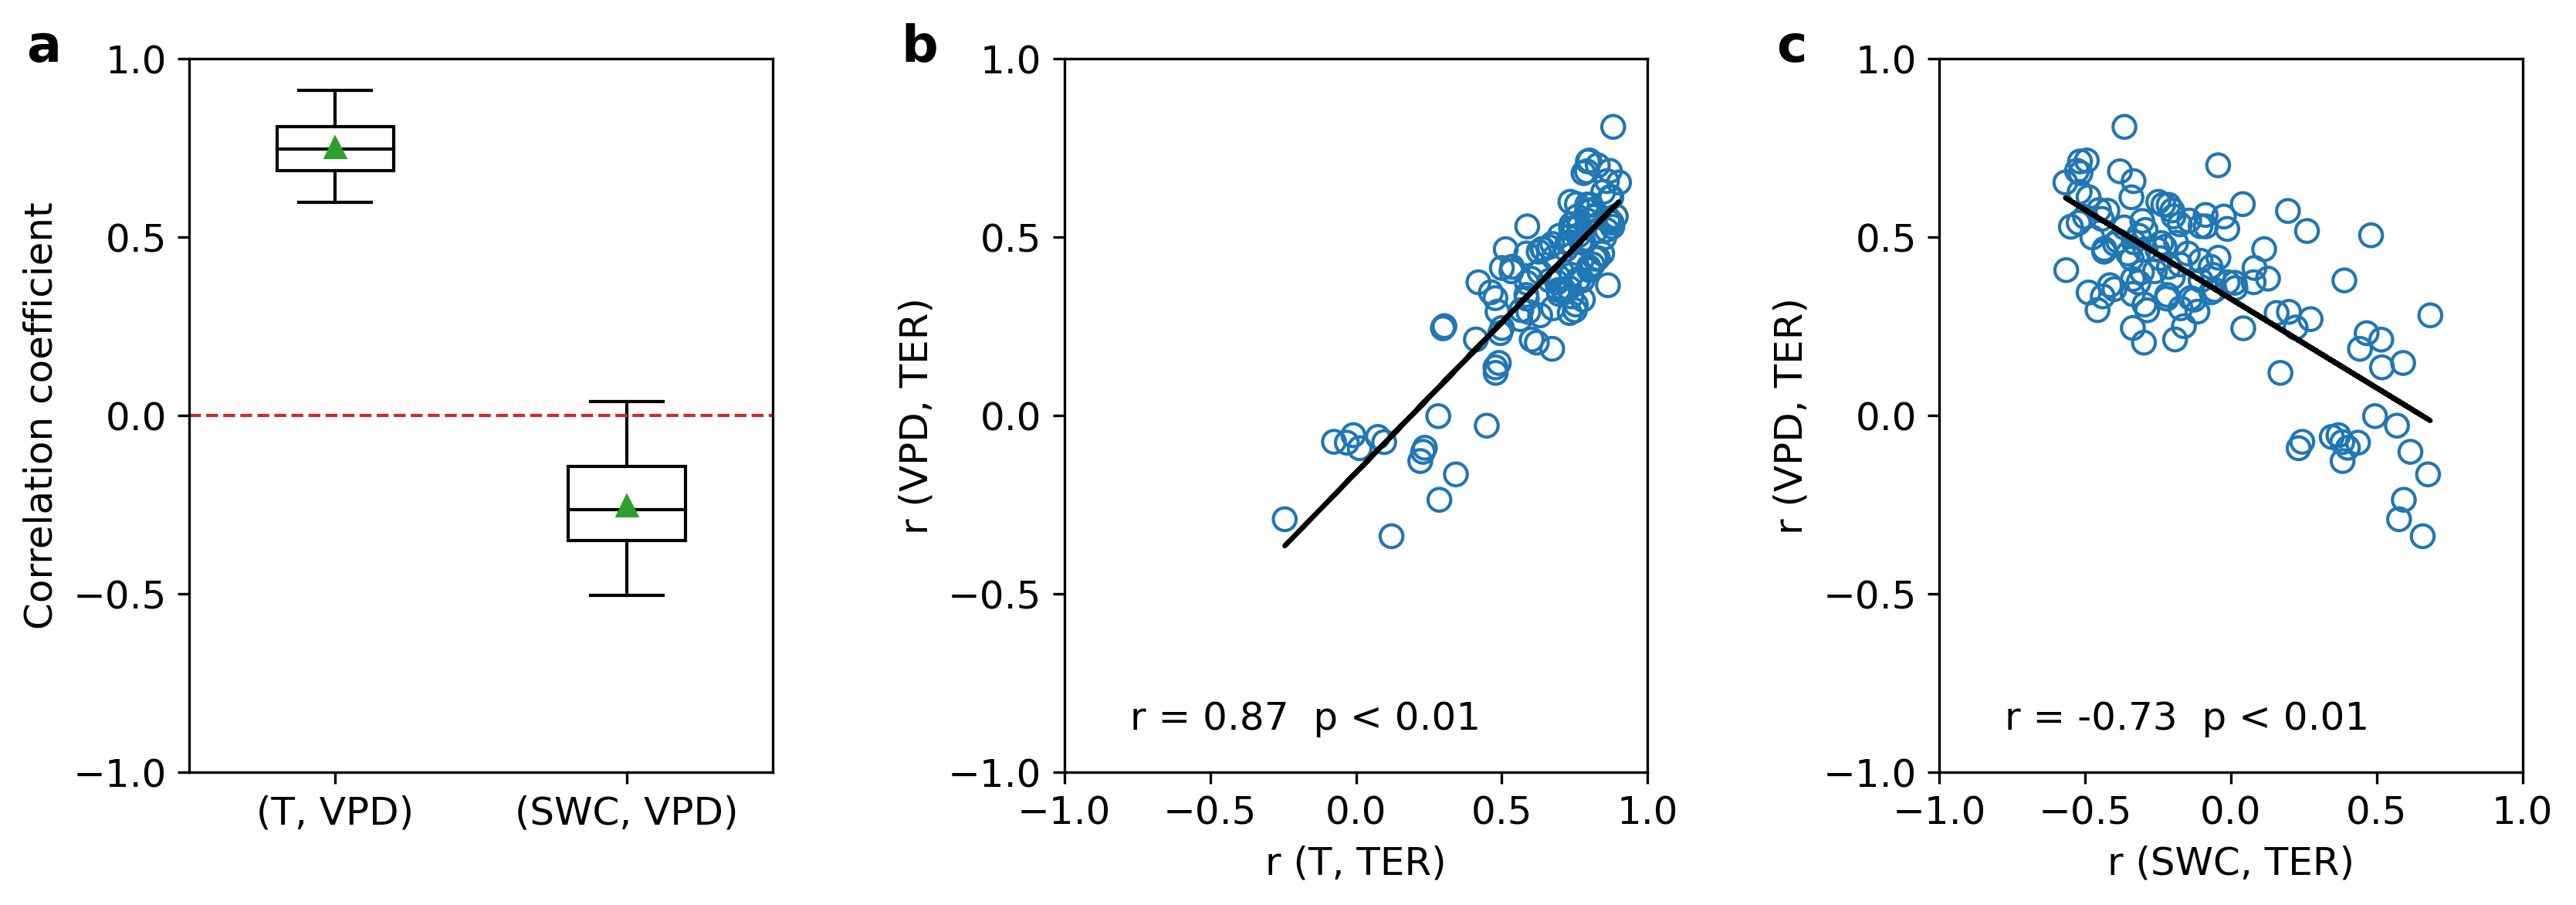

In [5]:
fig = plt.figure(figsize=(13, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)


ax1 = fig.add_subplot(1,3,1)
cm = plt.cm.get_cmap('Blues')
labels = ['(T, VPD)', '(SWC, VPD)']

boxplot = ax1.boxplot([cor_T_VPD1, cor_SWC_VPD1],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax1.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax1.set_ylabel('Correlation coefficient', size = 12);
ax1.tick_params(axis='x',labelsize=12);
ax1.tick_params(axis='y',labelsize=12)
ax1.set_yticks(np.linspace(-1,1,5))
ax1.set_ylim(-1,1)
ax1.text(-0.28, 1.05, "a", transform=ax1.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

#####################################################################################################################################################
ax2 = fig.add_subplot(1,3,2)
ax2.scatter(cor_T_RECO2, cor_VPD_RECO2, s=50, edgecolor='tab:blue', facecolor='none')
model = sm.OLS(cor_VPD_RECO2, sm.add_constant(cor_T_RECO2)).fit()
cor_VPD_RECO2_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax2.plot(cor_T_RECO2, cor_VPD_RECO2_fit, color='black', label = "r = "+str(round(pearsonr(cor_T_RECO2, cor_VPD_RECO2)[0],2))+'  p < 0.01', zorder = 2 )
ax2.set_xlabel('r (T, TER)',size = 12)
ax2.set_ylabel('r (VPD, TER)',size = 12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_xlim(-0.5,1);
ax2.set_ylim(-0.5,1);
ax2.set_xticks(np.linspace(-1,1,5))
ax2.set_yticks(np.linspace(-1,1,5))
ax2.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
ax2.text(-0.28, 1.05, "b", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')


#####################################################################################################################################################
ax3 = fig.add_subplot(1,3,3)
ax3.scatter(cor_SWC_RECO3, cor_VPD_RECO3, s=50, edgecolor='tab:blue', facecolor='none')
model = sm.OLS(cor_VPD_RECO3, sm.add_constant(cor_SWC_RECO3)).fit()
cor_VPD_RECO3_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax3.plot(cor_SWC_RECO3, cor_VPD_RECO3_fit, color='black', label = "r = "+str(round(pearsonr(cor_SWC_RECO3, cor_VPD_RECO3)[0],2))+'  p < 0.01', zorder = 2 )
ax3.set_xlabel('r (SWC, TER)',size = 12)
ax3.set_ylabel('r (VPD, TER)',size = 12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlim(-0.5,1);
ax3.set_ylim(-0.5,1);
ax3.set_xticks(np.linspace(-1,1,5))
ax3.set_yticks(np.linspace(-1,1,5))
ax3.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
ax3.text(-0.28, 1.05, "c", transform=ax3.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

#####################################################################################################################################################
'''ax4 = fig.add_subplot(2,2,4)
labels = ['(VPD,SWC)', '(T,SWC)']

boxplot = ax4.boxplot([cor_VPD_SWC4, cor_T_SWC4],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax4.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax4.set_ylabel('Correlation coefficient', size = 12);
ax4.tick_params(axis='x',labelsize=12);
ax4.tick_params(axis='y',labelsize=12)
ax4.set_yticks(np.linspace(-1,1,5))
ax4.set_ylim(-1,1)
ax4.text(-0.28, 1.05, "d", transform=ax4.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
'''

In [2]:
def month_saved(data):
    m,n = data.shape
    month_sa = []
    for i in range(12):
        T = []
        for j in range(m):
            if j%12 == i and data['TA_F_MDS'][j] != -9999:
                T.append(data['TA_F_MDS'][j])
        if np.mean(T) >= 0:
            month_sa.append(i+1)
    return month_sa

In [3]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

cor_VPD_SWC = ['VPD_SWC']
cor_T_SWC = ['T_SWC']

days = 15
i0=0
for csv_file1 in os.listdir(path1):
    if csv_file1[31:33] =='HH':
        hours = 48
    else:
        hours = 24
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            data1 = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_1') in data1.columns:
                i0+=1
                print(i0, csv_file1[4:10])
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
                if len(month_sa)>=2:
                    m,n = data1.shape
                    month = np.round(data1['TIMESTAMP_START']/1000000).astype(int)%100
                    for i in range(int(m/hours/days)-1):
                        #if month[i*days*48]>=month_sa[0] and (month[(i+1)*days*48]<=month_sa[-1]):
                        a = month[i*days*48:(i+1)*days*48]
                        b = np.array(month_sa)
                        if np.in1d(a, b).all():
                            Ti_0 = data1['TA_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            VPDi_0 = data1['VPD_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            SWCi_0 = data1['SWC_F_MDS_1'].values[i*days*hours:(i+1)*days*hours]
                            T_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            VPD_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            SWC_QCi_0 = data1['SWC_F_MDS_1_QC'].values[i*days*hours:(i+1)*days*hours]
                                    
                            Ti_1 = Ti_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            VPDi_1 = VPDi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            SWCi_1 = SWCi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                                    
                            if len(Ti_1) > 400:
                                SVPi_1 = 6.109*np.exp((17.625*Ti_1)/(243.04+Ti_1))
                                AVPi_1 = SVPi_1-VPDi_1

                                for AVPi in np.arange(5,25,2):
                                    for Ti in np.arange(5,31,2):
                                        VPD_i_AVP = VPDi_1[(AVPi_1>=AVPi-1) & (AVPi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        SWC_i_AVP = SWCi_1[(AVPi_1>=AVPi-1) & (AVPi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        
                                        if len(VPD_i_AVP)>50:
                                            #print(2)
                                            cor_VPD_SWC.append(pearsonr(VPD_i_AVP, SWC_i_AVP)[0])

                                        T_i_VPD = VPDi_1[(VPDi_1>=AVPi-1) & (VPDi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        SWC_i_VPD = SWCi_1[(VPDi_1>=AVPi-1) & (VPDi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        if len(T_i_VPD)>50:
                                            cor_T_SWC.append(pearsonr(T_i_VPD, SWC_i_VPD)[0])
                                    
l1 = len(cor_VPD_SWC)         
l2 = len(cor_T_SWC)
if l1>l2:
    for i in range(l1-l2):
        cor_T_SWC.append(np.nan)
elif l2>l1:
    for i in range(l1-l2):
        cor_VPD_SWC.append(np.nan)

result = np.array([cor_VPD_SWC, cor_T_SWC])
result_pd = pd.DataFrame(result.T)
save_path = './Cor_Result/New/Cor_15days_window_T.csv'
result_pd.to_csv(save_path, index= 'a', header= False)

1 AT-Neu


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


2 AU-ASM
3 AU-Cpr
4 AU-DaP
5 AU-DaS


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


6 AU-Dry


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


7 AU-Gin


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


8 AU-How


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


9 AU-Rig
10 AU-Stp
11 AU-Tum
12 AU-Wac
13 AU-Whr
14 AU-Wom
15 BE-Lon
16 BE-Vie


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


17 BR-Sa3


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


18 CA-Gro
19 CA-NS1
20 CA-NS2
21 CA-NS3
22 CA-NS4
23 CA-NS5
24 CA-NS6
25 CA-NS7
26 CA-Oas
27 CA-Obs
28 CA-Qfo
29 CA-SF1
30 CA-SF2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


31 CA-SF3


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


32 CA-TP1
33 CA-TP2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


34 CA-TP3


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


35 CA-TP4


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


36 CH-Cha


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


37 CH-Dav
38 CH-Fru


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


39 CH-Lae
40 CH-Oe1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


41 CH-Oe2
42 CN-Cng
43 CN-Du2
44 CN-Du3


D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


45 CZ-BK1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


46 CZ-BK2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


47 DE-Geb
48 DE-Gri
49 DE-Hai
50 DE-Kli
51 DE-Lkb


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


52 DE-Lnf
53 DE-Obe
54 DE-Seh
55 DE-Tha
56 DK-Eng
57 DK-Sor
58 ES-Amo
59 ES-LJu
60 FI-Hyy
61 FI-Jok
62 FI-Sod
63 FR-Gri
64 FR-LBr
65 GF-Guy


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


66 GH-Ank
67 GL-ZaH
68 IT-BCi
69 IT-CA1
70 IT-CA2
71 IT-CA3
72 IT-Col
73 IT-Cp2
74 IT-Cpz
75 IT-Lav
76 IT-MBo
77 IT-Noe
78 IT-Ren


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


79 IT-Ro1
80 IT-Ro2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


81 IT-SRo
82 IT-Tor
83 JP-SMF
84 MY-PSO
85 NL-Loo


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


86 RU-Fyo
87 SD-Dem


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


88 SN-Dhr
89 US-AR1
90 US-AR2
91 US-ARM
92 US-Blo
93 US-Cop
94 US-GLE


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


95 US-Goo


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


96 US-IB2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


97 US-KS2
98 US-LWW
99 US-Me2
100 US-Me3
101 US-Me4
102 US-Me5
103 US-Me6
104 US-MMS
105 US-Ne1
106 US-Ne2
107 US-Ne3
108 US-NR1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


109 US-Oho


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


110 US-PFa
111 US-Prr
112 US-SRC
113 US-SRG
114 US-SRM
115 US-Sta
116 US-Syv
117 US-Ton
118 US-UMB
119 US-UMd
120 US-Var


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


121 US-WCr
122 US-Whs


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


123 US-Wkg


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


124 ZM-Mon


In [9]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/'
path2 = 'D:/Data/Fluxnet/monthly_data/'

cor_SWC_RECO = ['SWC_RECO']
cor_VPD_RECO = ['VPD_RECO']

days = 15
i0=0
for csv_file1 in os.listdir(path1):
    if csv_file1[31:33] =='HH':
        hours = 48
    else:
        hours = 24
    for csv_file2 in os.listdir(path2):
        if csv_file1[4:10] == csv_file2[4:10]:
            data1 = pd.read_csv(path1+csv_file1)
            if ('SWC_F_MDS_1') in data1.columns:
                i0+=1
                print(i0, csv_file1[4:10])
                data2 = pd.read_csv(path2+csv_file2)
                month_sa = month_saved(data2)
                if len(month_sa)>=2:
                    m,n = data1.shape
                    month = np.round(data1['TIMESTAMP_START']/1000000).astype(int)%100
                    for i in range(int(m/hours/days)-1):
                        #if month[i*days*48]>=month_sa[0] and (month[(i+1)*days*48]<=month_sa[-1]):
                        a = month[i*days*48:(i+1)*days*48]
                        b = np.array(month_sa)
                        if np.in1d(a, b).all():
                            Ti_0 = data1['TA_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            VPDi_0 = data1['VPD_F_MDS'].values[i*days*hours:(i+1)*days*hours]
                            SWCi_0 = data1['SWC_F_MDS_1'].values[i*days*hours:(i+1)*days*hours]
                            T_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            VPD_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days*hours:(i+1)*days*hours]
                            SWC_QCi_0 = data1['SWC_F_MDS_1_QC'].values[i*days*hours:(i+1)*days*hours]
                            RECOi_0 = data1['RECO_NT_VUT_REF'].values[i*days*hours:(i+1)*days*hours]
                            
                            Ti_1 = Ti_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            VPDi_1 = VPDi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            SWCi_1 = SWCi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            RECOi_1 = RECOi_0[(Ti_0!=-9999) & (VPDi_0!=-9999) & (SWCi_0!=-9999) & (T_QCi_0==0) & (VPD_QCi_0==0) & (SWC_QCi_0==0)]
                            
                            if len(Ti_1) > 400:
                                SVPi_1 = 6.109*np.exp((17.625*Ti_1)/(243.04+Ti_1))
                                AVPi_1 = SVPi_1-VPDi_1

                                for AVPi in np.arange(5,25,2):
                                    for Ti in np.arange(5,31,2):
                                        VPD_i_AVP = VPDi_1[(AVPi_1>=AVPi-1) & (AVPi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        SWC_i_AVP = SWCi_1[(AVPi_1>=AVPi-1) & (AVPi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        RECOi_1_AVP = RECOi_1[(AVPi_1>=AVPi-1) & (AVPi_1<AVPi+1) & (Ti_1>=Ti-5) & (Ti_1<Ti+5)]
                                        
                                        if len(VPD_i_AVP)>50:
                        
                                            cor_VPD_RECO.append(pearsonr(VPD_i_AVP, RECOi_1_AVP)[0])
                                            cor_SWC_RECO.append(pearsonr(SWC_i_AVP, RECOi_1_AVP)[0])
                                    

result = np.array([cor_VPD_RECO, cor_SWC_RECO])
result_pd = pd.DataFrame(result.T)
save_path = './Cor_Result/New/Cor_RECO_15days_window.csv'
result_pd.to_csv(save_path, index= 'a', header= False)

1 AT-Neu


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


2 AU-ASM
3 AU-Cpr
4 AU-DaP


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


5 AU-DaS


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


6 AU-Dry


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


7 AU-Gin


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


8 AU-How


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


9 AU-Rig
10 AU-Stp


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


11 AU-Tum
12 AU-Wac


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


13 AU-Whr
14 AU-Wom
15 BE-Lon
16 BE-Vie


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


17 BR-Sa3


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


18 CA-Gro
19 CA-NS1
20 CA-NS2
21 CA-NS3
22 CA-NS4
23 CA-NS5
24 CA-NS6
25 CA-NS7
26 CA-Oas
27 CA-Obs
28 CA-Qfo
29 CA-SF1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


30 CA-SF2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


31 CA-SF3


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


32 CA-TP1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


33 CA-TP2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


34 CA-TP3


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


35 CA-TP4


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


36 CH-Cha


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


37 CH-Dav


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


38 CH-Fru


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


39 CH-Lae
40 CH-Oe1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


41 CH-Oe2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


42 CN-Cng
43 CN-Du2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


44 CN-Du3


D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
D:\software\anaconda\envs\Plot\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


45 CZ-BK1


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


46 CZ-BK2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


47 DE-Geb
48 DE-Gri
49 DE-Hai
50 DE-Kli
51 DE-Lkb


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


52 DE-Lnf
53 DE-Obe
54 DE-Seh
55 DE-Tha
56 DK-Eng
57 DK-Sor
58 ES-Amo
59 ES-LJu


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


60 FI-Hyy
61 FI-Jok
62 FI-Sod
63 FR-Gri
64 FR-LBr


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


65 GF-Guy
66 GH-Ank
67 GL-ZaH
68 IT-BCi
69 IT-CA1
70 IT-CA2
71 IT-CA3
72 IT-Col
73 IT-Cp2
74 IT-Cpz


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


75 IT-Lav


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


76 IT-MBo
77 IT-Noe


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


78 IT-Ren


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


79 IT-Ro1
80 IT-Ro2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


81 IT-SRo
82 IT-Tor
83 JP-SMF
84 MY-PSO
85 NL-Loo


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


86 RU-Fyo
87 SD-Dem


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


88 SN-Dhr
89 US-AR1
90 US-AR2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


91 US-ARM


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


92 US-Blo


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


93 US-Cop
94 US-GLE


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


95 US-Goo


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


96 US-IB2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


97 US-KS2
98 US-LWW


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


99 US-Me2


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


100 US-Me3
101 US-Me4
102 US-Me5
103 US-Me6
104 US-MMS
105 US-Ne1
106 US-Ne2
107 US-Ne3
108 US-NR1
109 US-Oho


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


110 US-PFa
111 US-Prr
112 US-SRC


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


113 US-SRG
114 US-SRM
115 US-Sta
116 US-Syv


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


117 US-Ton


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


118 US-UMB
119 US-UMd
120 US-Var


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


121 US-WCr


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


122 US-Whs


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


123 US-Wkg


D:\software\anaconda\envs\Plot\lib\site-packages\scipy\stats\_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


124 ZM-Mon


In [2]:
data = pd.read_csv('./Cor_Result/Cor_RECO_15days_window.csv')
m,n = data.shape
cor_VPD_RECO4 = []
cor_SWC_RECO4 = []
for i in range(m):
    if np.isnan(data['VPD_RECO'][i]) != 1 and np.isnan(data['SWC_RECO'][i]) != 1:
        cor_VPD_RECO4.append(data['VPD_RECO'][i])
        cor_SWC_RECO4.append(data['SWC_RECO'][i])

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde

In [5]:
x = cor_VPD_RECO4
y = cor_SWC_RECO4
xy = np.vstack([x,y])
z1 = gaussian_kde(xy)(xy)

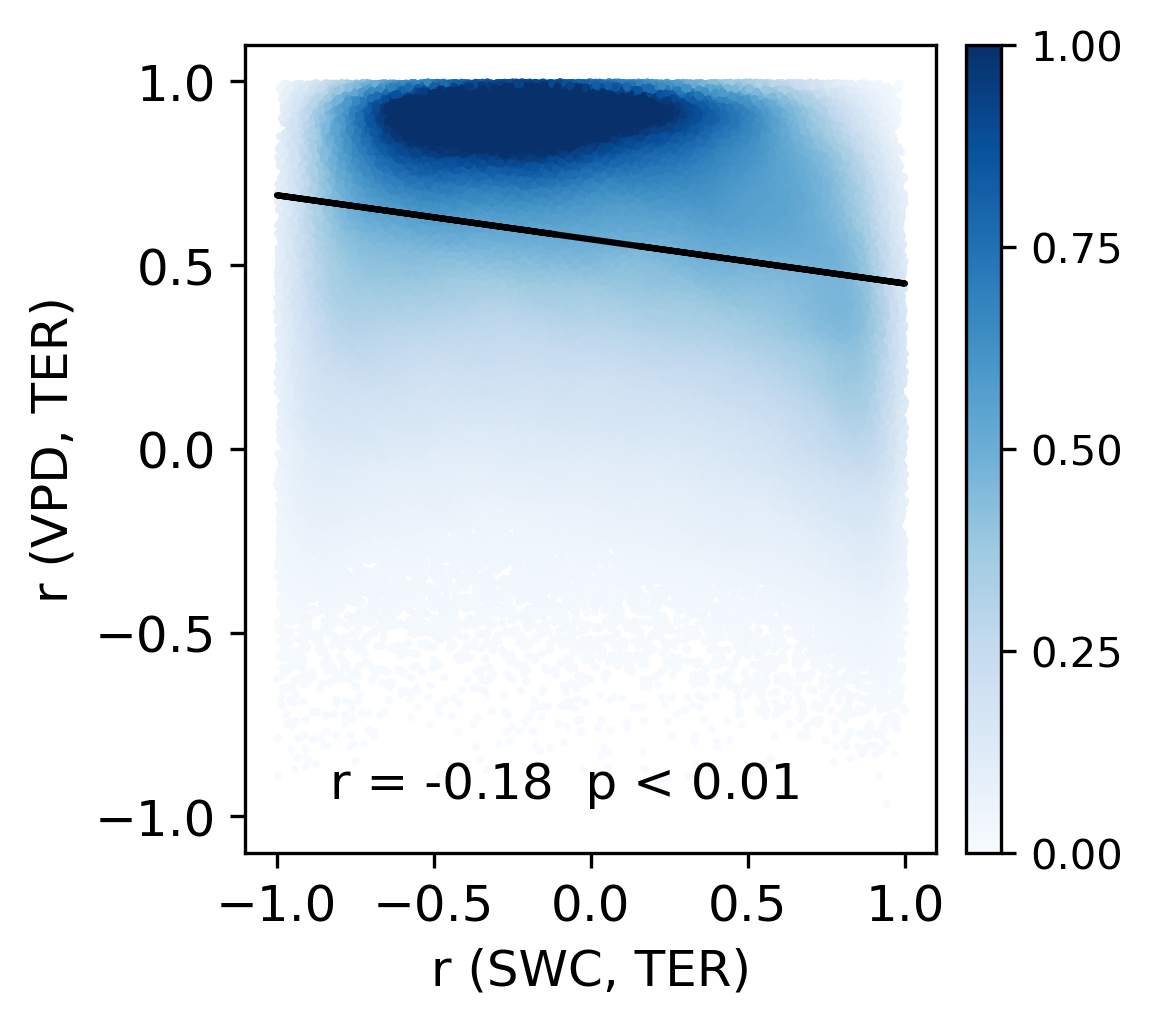

In [15]:
fig = plt.figure(figsize=(13*1/4, 3.5),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.4)

ax3 = fig.add_subplot(1,1,1)
im3 = ax3.scatter(cor_SWC_RECO4, cor_VPD_RECO4, c=z1, s=1, cmap='Blues', vmin=0,vmax=1)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.new_horizontal(size="5%", pad=0.1, axes_class=plt.Axes)
fig.add_axes(cax3)
cbar3 = plt.colorbar(im3, cax=cax3, ticks = np.linspace(0,1,5))

model = sm.OLS(cor_VPD_RECO4, sm.add_constant(cor_SWC_RECO4)).fit()
cor_VPD_RECO4_fit = model.fittedvalues
r_squared = model.rsquared
intercept,slope1 = model.params
ax3.plot(cor_SWC_RECO4, cor_VPD_RECO4_fit, color='black', label = "r = "+str(round(pearsonr(cor_SWC_RECO4, cor_VPD_RECO4)[0],2))+'  p < 0.01', zorder = 2 )
ax3.set_xlabel('r (SWC, TER)',size = 12)
ax3.set_ylabel('r (VPD, TER)',size = 12)
ax3.tick_params(axis='x', labelsize=12)
ax3.tick_params(axis='y', labelsize=12)
ax3.set_xlim(-1.1,1.1);
ax3.set_ylim(-1.1,1.1);
ax3.set_xticks(np.linspace(-1,1,5))
ax3.set_yticks(np.linspace(-1,1,5))
ax3.legend(fontsize=12, edgecolor='white', loc='lower left', frameon=False, handlelength = 0)
#ax3.text(-0.28, 1.05, "", transform=ax3.transAxes,
#         fontsize=16, fontweight='bold', va='top', ha='left')


In [5]:
data = pd.read_csv('./Cor_result/Cor_15days_window_T.csv')
m,n = data.shape
cor_VPD_SWC = []
for i in range(m):
    if np.isnan(data['VPD_SWC'][i]) != 1:
        cor_VPD_SWC.append(data['VPD_SWC'][i])
cor_T_SWC = []
for i in range(m):
    if np.isnan(data['T_SWC'][i]) != 1:
        cor_T_SWC.append(data['T_SWC'][i])

C:\Users\111\AppData\Local\Temp\ipykernel_7972\2015325530.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Blues')


(-1.0, 1.0)

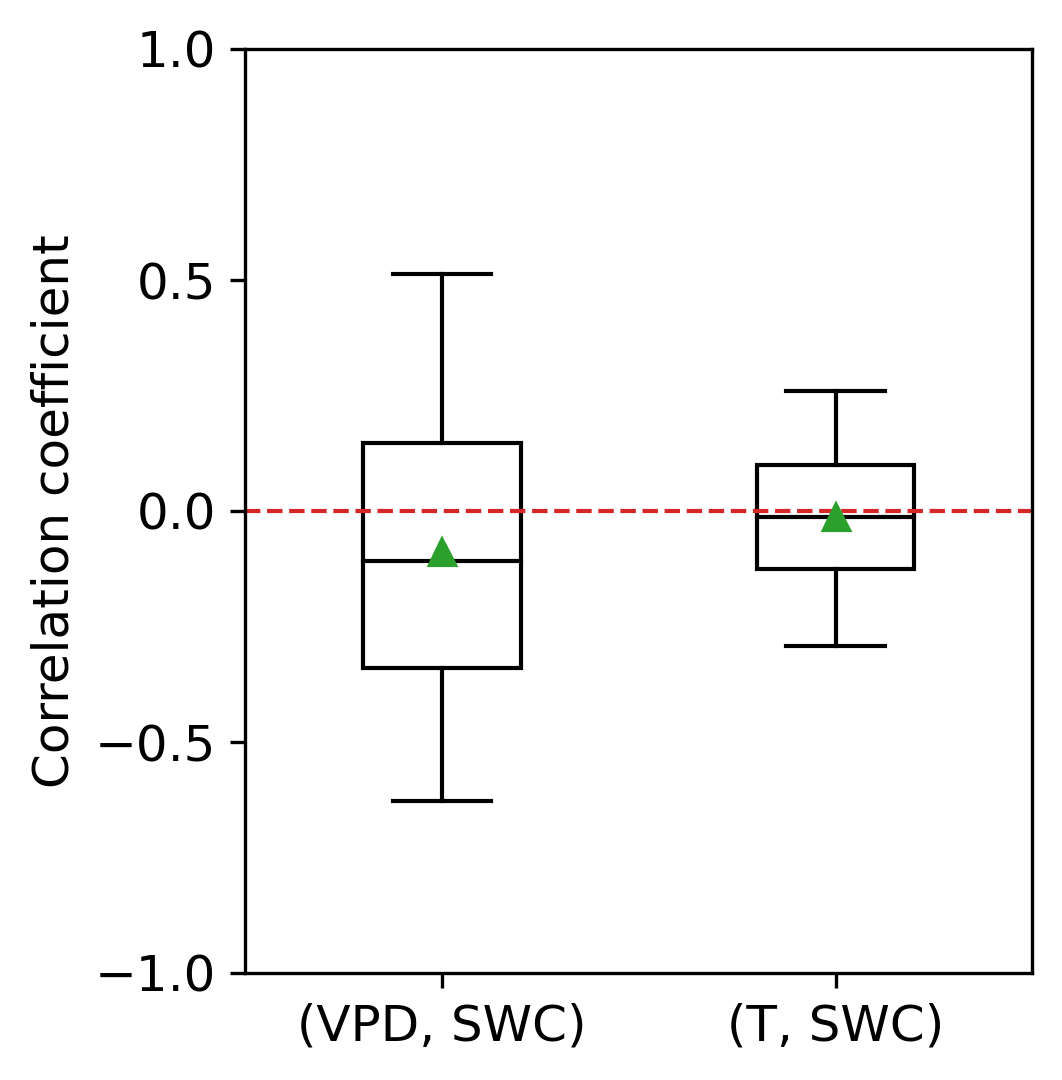

In [7]:
fig = plt.figure(figsize=(13*2.5/4, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)
ax1 = fig.add_subplot(1,2,1)
cm = plt.cm.get_cmap('Blues')
labels = ['(VPD, SWC)', '(T, SWC)']

boxplot = ax1.boxplot([cor_VPD_SWC, cor_T_SWC],
                whis = (5,95),
                vert=True,  
                patch_artist=True,
                showfliers = False,
                showmeans =True,
                meanprops={'marker': '^', 'markersize': 6, 'color':'red'},
                medianprops = {'color':'black'},
                labels = labels,
                widths=0.4,
                capwidths=0.25,
            )

box_color = 'white'
box_alpha = 1.0
for patch in boxplot['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)

ax1.axhline(y=0,ls="--",linewidth=1,c="tab:red", zorder=2)
ax1.set_ylabel('Correlation coefficient', size = 12);
ax1.tick_params(axis='x',labelsize=12);
ax1.tick_params(axis='y',labelsize=12)
ax1.set_yticks(np.linspace(-1,1,5))
ax1.set_ylim(-1,1)
#ax1.text(-0.3, 1.1, "a", transform=ax1.transAxes,
#         fontsize=22, fontweight='bold', va='top', ha='left')